In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror{font-family:Consolas; font-size:17pt;}
div.output{font-size:17pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:17pt;}
div.prompt{min-width:70px;}
"""))

(24, 24, 4)
<class 'numpy.ndarray'>


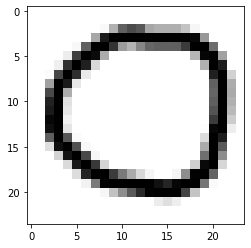

In [2]:
import matplotlib.pyplot as plt
c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png')
plt.imshow(c0)
print(c0.shape)
print(type(c0))

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링
from tensorflow.keras.layers import MaxPool2D # 풀링
from tensorflow.keras.layers import Flatten # 2차원 영상 데이터를 1차원
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(3)

In [4]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화작업
train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/hard_handwriting_shape/train',
                    target_size = (24,24),
                    batch_size=3,
                    class_mode = "categorical")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/hard_handwriting_shape/test',
                    target_size= (24,24),
                    batch_size=3,
                    class_mode = "categorical")

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
# 2. 모델 구성
# Conv2D(필터갯수, 필터사이즈, activation_fun, 입력사이즈)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Flatten()) # 2차원 이미지데이터를 1차원으로
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [6]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_generator,
                   validation_steps=5)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 69ms/step - loss: 1.1225 - accuracy: 0.5541 - val_loss: 2.1536 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.9833 - val_loss: 3.2099 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0585 - accuracy: 1.0000 - val_loss: 3.9332 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.8277 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 2.3615e-04 - accuracy: 1.0000 - val_loss: 5.4750 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 3.2930e-04 - accuracy: 1.0000 - val_loss: 5.7096 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 1.9639e-04 - accuracy: 1.0000 - val_loss: 5.6682 - val_accuracy: 0.4000
E

In [7]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print('loss :',score[0])
print('accuracy :',score[1])
print()
# 6. 예측 하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(pred)

loss : 6.778771877288818
accuracy : 0.3333333432674408

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.46 0.00 0.54]
 [0.00 0.00 1.00]
 [0.34 0.01 0.66]
 [0.00 0.01 0.99]
 [0.00 0.00 1.00]
 [0.02 0.00 0.98]
 [0.00 0.00 1.00]
 [0.00 0.01 0.99]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]]


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


# accuracy 늘리기
<ul>
    <li> 데이터 확보, 데이터 부풀리기(ImageDataGenerator)</li>
    <li> 레이어 층<li> 레이어 층

In [8]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255, # 정규화작업
                            rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.7, #0.7라이안 밀림
                            zoom_range=[0.9,2.2], # 0.9배~2.2배
                            horizontal_flip=True, # 수평방향으로 뒤집기
                            vertical_flip=True, # 수직방향으로 뒤집기
                            fill_mode='nearest')#이미지를 회전, 
                              #이동하거나 축소할 때 공간을 채우는 방식

train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/hand_test/train',
                    target_size = (24,24),
                    batch_size=3,
                    class_mode = "categorical")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/hand_test/test',
                    target_size= (24,24),
                    batch_size=3,
                    class_mode = "categorical")

Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [12]:
# 2. 모델 구성
# Conv2D(필터갯수, 필터사이즈, activation_fun, 입력사이즈)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Dropout(0.1)) # 과적합을 막는 목적
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Dropout(0.1))
model.add(Flatten()) # 2차원 이미지데이터를 1차원으로
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [13]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_generator,
                   validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 21ms/step - loss: 1.1218 - accuracy: 0.2184 - val_loss: 1.0936 - val_accuracy: 0.6000
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0802 - accuracy: 0.4428 - val_loss: 1.0908 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 1.1066 - accuracy: 0.4138 - val_loss: 1.0751 - val_accuracy: 0.4667
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0852 - accuracy: 0.4073 - val_loss: 1.0319 - val_accuracy: 0.4667
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0078 - accuracy: 0.6283 - val_loss: 1.0061 - val_accuracy: 0.6000
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0042 - accuracy: 0.5059 - val_loss: 1.1227 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7551 - accuracy: 0.7470 - val_loss: 0.9556 - val_accuracy: 0.4667
Epoch 8/50
15/15 [=

In [14]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print('loss :',score[0])
print('accuracy :',score[1])
print()
# 6. 예측 하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(np.argmax(pred, axis=1))
print(pred)

loss : 0.6738671660423279
accuracy : 0.800000011920929

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[2 2 0 0 0 2 2 0 1 1 0 1 2 1 2]
[[0.00 0.00 1.00]
 [0.01 0.00 0.99]
 [1.00 0.00 0.00]
 [0.99 0.00 0.01]
 [1.00 0.00 0.00]
 [0.32 0.05 0.63]
 [0.15 0.02 0.82]
 [0.59 0.30 0.11]
 [0.32 0.37 0.32]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.29 0.16 0.55]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]]
